<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
---
ВАРИАНТ РАБОТЫ имеет вид: ZPN, где

Z=1-6 – вид закона распределения генерируемых признаков

1.     Биномиальное

2.     Геометрическое

3.     Гипергеометрическое

4.     Пуассона

5.     Равномерное

6.     Нормальное

P=2,3 – число признаков

N=3,4,5 – число классов

ПОРЯДОК ВЫПОЛНЕНИЯ РАБОТЫ

1.     Сгенерировать случайные числа по указанному закону распределения. Из них создается матрица из M строк (наблюдений) и P столбцов (признаков). Сгенерированные строки должны принадлежать одному из N классов за счет прибавления к сгенерированным числам положительной или отрицательной добавки (функция)
2.     Все признаки   должны быть числовыми и нормализованными (находиться в диапазоне [0,1]). Дополнительно создается классификационный признак.

3.     Разделить данные варианта на  обучающую и тестирующую выборки.

4.     Персептрон. Так как персептрон способен делить объекты только на два класса, то организуем работу итерационно:

        4.1.  Создать персептрон для отделения 1 класса от всех остальных. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 1 класса.

        4.2.  Создать персептрон для отделения 2 класса от оставшихся. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 2 класса

        4.3.  Продолжить, пока не будут разделены все объекты

        4.4.  Построить графики разделяющей поверхности и визуальное представление результатов тестирования

5.     Сеть Кохонена (Kohonen). Вероятностная нейронная сеть (PNN).  Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Осуществить кластеризацию с помощью конкурирующей сети (слой Кохонена), а затем классификацию с помощью двух трехслойных сетей: вероятностной нейронной сети (PNN) и сети с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Для каждого вида сети выполнить следующие этапы:

     5.1 Создание сети

     5.2 Обучение сети на обучающей выборке

     5.3 Протестировать сеть отдельно по обучающей и по тестирующей выборке

     5.4 Построить визуальное представление результатов тестирования

     5.5 Оценить качество классификации в виде матриц

     5.6 Выдать число итераций обучения

6.     Оформить результаты в виде таблицы


In [115]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [116]:
# Указываем параметры
Z = 1  # Выбираем гипергеометричское распределение
P = 2  # Число признаков
N = 5  # Число классов

M = 100  # Число наблюдений
data = []
for i in range(N):

    ngood = np.random.randint(70, 100)
    nbad = 100 - ngood
    nsample = np.random.randint(1, 100)

    c = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=nsample, size=(M, P))
    # ngood - количество "хороших" элементов в выборке
    # nbad - количество "плохих" элементов в выборке
    # nsample - общий размер выборки
    # size - форма матрицы данных

    data.append(c)

In [117]:

# Собираем признаки из всех классов
x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y

xy = [[x[i], y[i]] for i in range(len(x))]

In [118]:
# Создаем список Y, присваивая каждому классу уникальное значение
# Y будет представлять классификационный признак,
# который указывает на принадлежность каждой точки данных к одному из 5 классов.
Y = []
for i in range(N):
    Y.extend([i] * M)

# Преобразуем список Y в массив numpy
Y = np.array(Y)

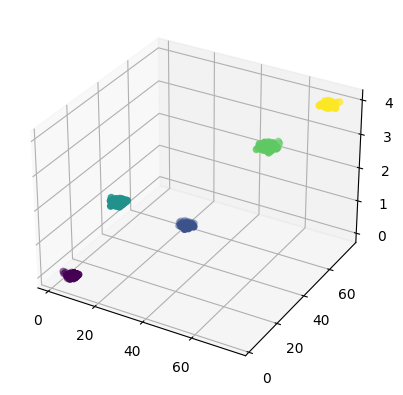

In [119]:
# Создаем DataFrame
res_df = pd.DataFrame(xy)

# Создаем трехмерный рассеянный график с использованием matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отображаем трехмерный рассеянный график.
ax.scatter(x, y, Y, c=Y)  # x, y - координаты, Y - цвета точек

# Показываем график.
plt.show()

In [120]:
# Стандартизируем данные
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standart_df = pd.DataFrame(sc.fit_transform(res_df))
standart_df.describe()

,0,1
count,5.000000e+02,5.000000e+02
mean,1.705303e-16,-5.684342e-17
std,1.001002e+00,1.001002e+00
min,-1.489788e+00,-1.416249e+00
25%,-8.375168e-01,-8.423380e-01
50%,-1.037112e-01,-6.345820e-02
75%,8.339293e-01,8.384026e-01
max,1.567735e+00,1.576289e+00


In [121]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами:
# - n_clusters=5 указывает, что мы хотим разделить данные на 5 кластера.
# - random_state=0 используется для установки начального состояния генератора случайных чисел и обеспечения воспроизводимости результатов.
kmeans = KMeans(n_clusters=5,n_init=10, random_state=0)

# Обучаем модель K-Means на стандартизированных данных `standart_df`.
kmeans.fit(standart_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [126]:
# Создаем DataFrame `df_cluster_centers` для хранения координат центров кластеров.
df_cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

# Выводим DataFrame `df_cluster_centers`, который содержит координаты центров кластеров.
print(df_cluster_centers)
print("----------------------------------------------------------------------------------")
print("матрица ошибок")
# Выводим матрицу ошибок, которая показывает, как точки данных распределены по кластерам
# и сравнивает это с истинными метками классов.
# `Y` содержит истинные метки классов, а `kmeans.labels_` содержит предсказанные метки кластеров.
confusion_mat = confusion_matrix(Y, kmeans.labels_)
print(confusion_mat)

          0         1
0 -0.091889 -0.082315
1  1.422197  1.413134
2 -1.308783 -1.305976
3 -0.798381 -0.810773
4  0.776856  0.785931
----------------------------------------------------------------------------------
матрица ошибок
[[  0   0 100   0   0]
 [100   0   0   0   0]
 [  0   0   0 100   0]
 [  0   0   0   0 100]
 [  0 100   0   0   0]]


In [123]:
# Создаем трехмерный рассеянный график
fig = go.Figure()

# Добавляем точки данных с цветами, соответствующими меткам кластеров
for i in range(N):
    fig.add_trace(go.Scatter3d(
        x=data[i][:, 0],
        y=data[i][:, 1],
        z=[i] * M,  # Используем индекс класса для координаты Z
        mode='markers',
        marker=dict(size=2, color=kmeans.labels_)
    ))

# Добавляем точки для центров кластеров (df_cluster_centers)
fig.add_trace(go.Scatter3d(
    x=df_cluster_centers[0],
    y=df_cluster_centers[1],
    z=[i + 1 for i in range(N)],  # Смещаем Z, чтобы точки центров кластеров были над точками данных
    mode='markers',
    marker=dict(size=6, color='red')
))

# Определяем метки осей
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Cluster'))

# Отображаем график
fig.show()

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standart_df, kmeans.labels_, test_size=0.2, random_state=42)

# X_train - обучающие признаки
# X_test - тестовые признаки
# y_train - метки обучающих данных
# y_test - метки тестовых данных

# Персептрон

In [132]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [135]:
# Создаю экземпляр класса Perceptron
net = Perceptron(learning_rate=0.01, n_iters=1000)
# Загружаю обучающую выборку X_train и метки классов Y_train
# Нужно убедиться, что данные подготовлены в правильном формате.

# Обучите персептрон на обучающих данных
net.fit(X_train, Y)

In [ ]:
# Теперь можно использовать обученный персептрон для предсказания меток классов на новых данных
Y_pred = net.predict(X_test)